In [133]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
from imdb import IMDb
%qtconsole

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

Ratings Data File Structure (ratings.csv)
-----------------------------------------

All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

    userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [4]:
ratings = pd.read_csv('ml-latest-small/ratings.csv').drop('timestamp', 1)
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


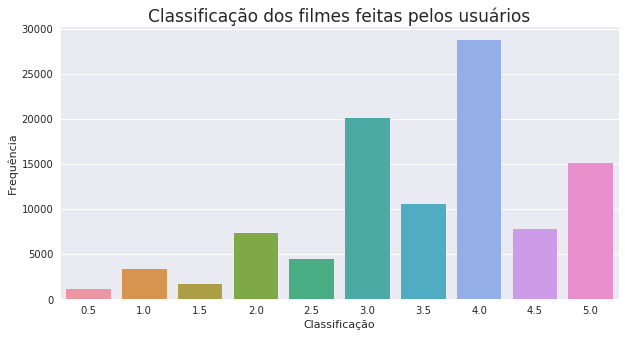

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='rating', data=ratings, ax=ax)
plt.title('Classificação dos filmes feitas pelos usuários', fontsize=17)
plt.xlabel('Classificação')
plt.ylabel('Frequência')
fig.savefig('plot.png', dpi=250);

Movies Data File Structure (movies.csv)
---------------------------------------

Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,title,genres

Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In [121]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies['genres'] = movies['genres'].apply(lambda s: s.split('|'))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


## Experimentos

In [122]:
def get_movie_name(movie_id):
    return movies[movies['movieId'] == movie_id]['title'].values[0]

In [7]:
pt = ratings.pivot_table(index='userId', columns='movieId', values='rating').apply(lambda x: x-np.mean(x), axis=1).fillna(0).T

(9066, 671)

In [8]:
pt_sparse = sp.sparse.csr_matrix(pt.values)

<9066x671 sparse matrix of type '<class 'numpy.float64'>'
	with 99621 stored elements in Compressed Sparse Row format>

In [10]:
item_similarity = cosine_similarity(pt_sparse)
user_similarity = cosine_similarity(pt_sparse.T)

In [19]:
item_df = pd.DataFrame(item_similarity, index= pt.index, columns= pt.index)
user_df = pd.DataFrame(user_similarity, index= pt.columns, columns= pt.columns)

In [131]:
def get_similar_movies(movie_id):
    print('Filmes similares à {}:\n'.format(get_movie_name(movie_id)))
    for position, item in zip(range(1, 11), item_df.sort_values(by=movie_id, ascending= False).index[1:11]):
        print('{}: {}'.format(position, get_movie_name(item)))

In [132]:
get_similar_movies(1)

Filmes similares à Toy Story (1995):

1: Toy Story 2 (1999)
2: Toy Story 3 (2010)
3: Bug's Life, A (1998)
4: Hudsucker Proxy, The (1994)
5: Incredibles, The (2004)
6: Robin Hood (1973)
7: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
8: Dark Knight, The (2008)
9: Monsters, Inc. (2001)
10: Social Network, The (2010)


In [ ]:
# This function constructs a list of lists containing the highest rated shows per similar user
# and returns the name of the show along with the frequency it appears in the list

def recommend(user=0):
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for sim_user in sim_users:
        max_score = pt.loc[:, sim_user].max()
        best.append(pt[pt.loc[:, sim_user]==max_score].index.tolist())
        
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]
similar_user_recs(666)